SIZE:
CT: 	(144, 144, 144) 
PET: 	(144, 144, 144) 
Mask: 	(144, 144, 144)
----------------------------------------
SPACING:
CT: 	(1.0, 1.0, 1.0) 
PET: 	(1.0, 1.0, 1.0) 
Mask: 	(1.0, 1.0, 1.0)
----------------------------------------
ORIGIN:
CT: 	(-65.0390625, -166.9921875, -204.05026245117188) 
PET: 	(-65.0390625, -166.9921875, -204.05026245117188) 
Mask: 	(-65.0390625, -166.9921875, -204.05026245117188)
----------------------------------------
DIRECTION:
CT: 	(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0) 
PET: 	(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0) 
Mask: 	(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


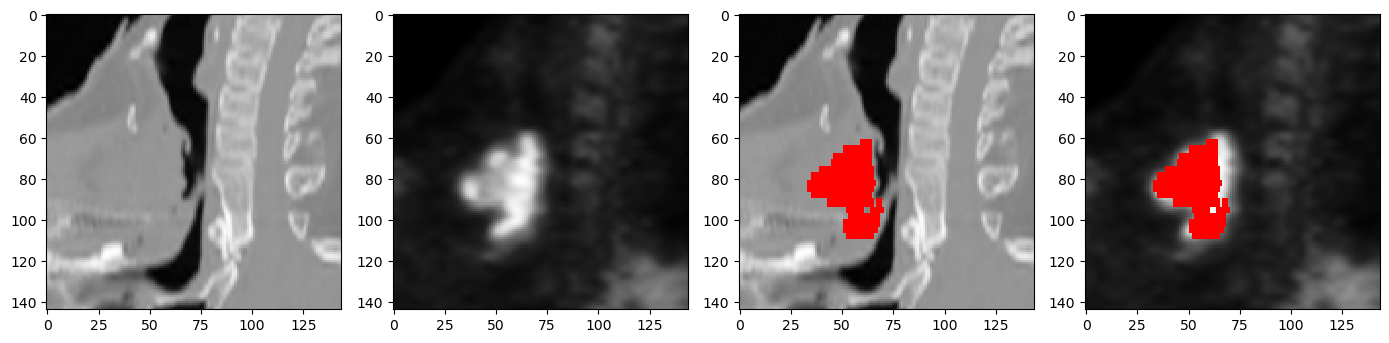

In [3]:
import os
import sys
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
import SimpleITK as sitk
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt

path_to_output="hecktor2021_train\\hecktor2021_train\\hecktor_nii_resampled"
input_folder1 = Path(path_to_output)
patient_list = [f.name.split("_")[0] for f in input_folder1.rglob("*_ct*")]
n = 0
p =patient_list[0]

def read_nifti(path):
    """Read a NIfTI image. Return a SimpleITK Image."""
    nifti = sitk.ReadImage(str(path))
    return nifti
img_ct1 = read_nifti(input_folder1 / (p + '_ct.nii.gz'))
img_pt1 = read_nifti(input_folder1 / (p + '_pt.nii.gz'))
mask1 = read_nifti(input_folder1 / (p + '_gtvt.nii.gz'))

input_folder=input_folder1
img_ct = sitk.ReadImage(str([f for f in input_folder.rglob(p + "_ct*")][0].resolve()))
img_pt = sitk.ReadImage(str([f for f in input_folder.rglob(p + "_pt*")][0].resolve()))
mask = sitk.ReadImage(str([f for f in input_folder.rglob(p + "_gtvt*")][0].resolve()))

print(f'SIZE:')
print(f'CT: \t{img_ct.GetSize()} \nPET: \t{img_pt.GetSize()} \nMask: \t{mask.GetSize()}')
print('-' * 40)
print(f'SPACING:')
print(f'CT: \t{img_ct.GetSpacing()} \nPET: \t{img_pt.GetSpacing()} \nMask: \t{mask.GetSpacing()}') 
print('-' * 40)
print(f'ORIGIN:')
print(f'CT: \t{img_ct.GetOrigin()} \nPET: \t{img_pt.GetOrigin()} \nMask: \t{mask.GetOrigin()}') 
print('-' * 40)
print(f'DIRECTION:')
print(f'CT: \t{img_ct.GetDirection()} \nPET: \t{img_pt.GetDirection()} \nMask: \t{mask.GetDirection()}')

#Visualization:
from copy import copy
img_ct = sitk.GetArrayFromImage(img_ct)
img_pt = sitk.GetArrayFromImage(img_pt)
mask = sitk.GetArrayFromImage(mask)
img_ct_mask = np.ma.masked_where(img_ct * mask != 0, img_ct)
img_pt_mask = np.ma.masked_where(img_pt * mask != 0, img_pt)

s = 75

plt.rcdefaults()
palette = copy(plt.cm.Greys_r)
palette.set_bad(color='r', alpha=1)  # set color for the mask

fig, axes = plt.subplots(1, 4, figsize=(14, 10))
axes[0].imshow(img_ct[:, :, s], cmap=plt.cm.Greys_r, interpolation='none')
axes[1].imshow(img_pt[:, :, s], cmap=plt.cm.Greys_r, interpolation='none')
axes[2].imshow(img_ct_mask[:, :, s], cmap=palette, interpolation='none')
axes[3].imshow(img_pt_mask[:, :, s], cmap=palette, interpolation='none')
plt.tight_layout()
plt.show()

SIZE:
CT: 	(144, 144, 144) 
PET: 	(144, 144, 144) 
Mask: 	(144, 144, 144)
----------------------------------------
SPACING:
CT: 	(1.0, 1.0, 1.0) 
PET: 	(1.0, 1.0, 1.0) 
Mask: 	(1.0, 1.0, 1.0)
----------------------------------------
ORIGIN:
CT: 	(-50.9765625, -152.9296875, -230.13021850585938) 
PET: 	(-50.9765625, -152.9296875, -230.13021850585938) 
Mask: 	(-50.9765625, -152.9296875, -230.13021850585938)
----------------------------------------
DIRECTION:
CT: 	(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0) 
PET: 	(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0) 
Mask: 	(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


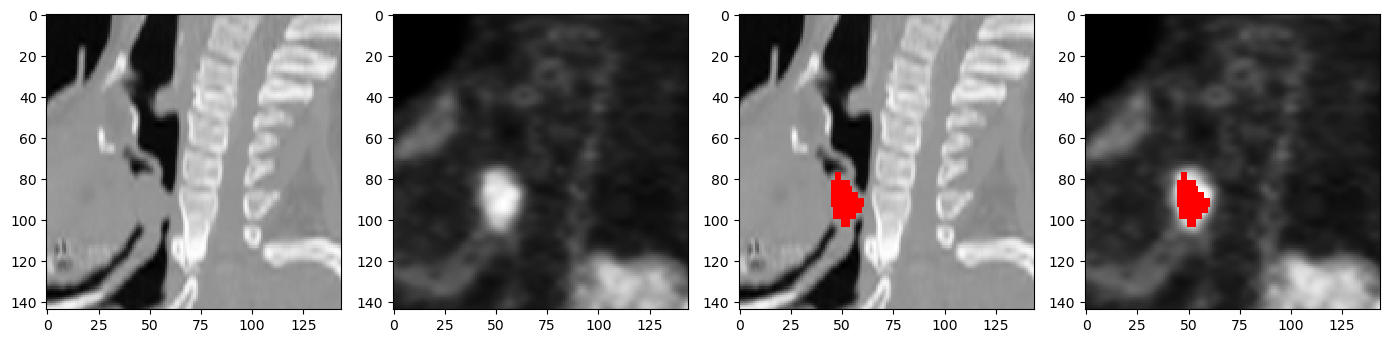

In [12]:
import os
import sys
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
import SimpleITK as sitk
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt

path_to_output="hecktor2021_train\\hecktor2021_train\\hecktor_nii_resampled"
input_folder1 = Path(path_to_output)
patient_list = [f.name.split("_")[0] for f in input_folder1.rglob("*_ct*")]
n = 0
p =patient_list[10]

def read_nifti(path):
    """Read a NIfTI image. Return a SimpleITK Image."""
    nifti = sitk.ReadImage(str(path))
    return nifti
img_ct1 = read_nifti(input_folder1 / (p + '_ct.nii.gz'))
img_pt1 = read_nifti(input_folder1 / (p + '_pt.nii.gz'))
mask1 = read_nifti(input_folder1 / (p + '_gtvt.nii.gz'))

input_folder=input_folder1
img_ct = sitk.ReadImage(str([f for f in input_folder.rglob(p + "_ct*")][0].resolve()))
img_pt = sitk.ReadImage(str([f for f in input_folder.rglob(p + "_pt*")][0].resolve()))
mask = sitk.ReadImage(str([f for f in input_folder.rglob(p + "_gtvt*")][0].resolve()))

print(f'SIZE:')
print(f'CT: \t{img_ct.GetSize()} \nPET: \t{img_pt.GetSize()} \nMask: \t{mask.GetSize()}')
print('-' * 40)
print(f'SPACING:')
print(f'CT: \t{img_ct.GetSpacing()} \nPET: \t{img_pt.GetSpacing()} \nMask: \t{mask.GetSpacing()}') 
print('-' * 40)
print(f'ORIGIN:')
print(f'CT: \t{img_ct.GetOrigin()} \nPET: \t{img_pt.GetOrigin()} \nMask: \t{mask.GetOrigin()}') 
print('-' * 40)
print(f'DIRECTION:')
print(f'CT: \t{img_ct.GetDirection()} \nPET: \t{img_pt.GetDirection()} \nMask: \t{mask.GetDirection()}')

#Visualization:
from copy import copy
img_ct = sitk.GetArrayFromImage(img_ct)
img_pt = sitk.GetArrayFromImage(img_pt)
mask = sitk.GetArrayFromImage(mask)
img_ct_mask = np.ma.masked_where(img_ct * mask != 0, img_ct)
img_pt_mask = np.ma.masked_where(img_pt * mask != 0, img_pt)

s = 75

plt.rcdefaults()
palette = copy(plt.cm.Greys_r)
palette.set_bad(color='r', alpha=1)  # set color for the mask

fig, axes = plt.subplots(1, 4, figsize=(14, 10))
axes[0].imshow(img_ct[:, :, s], cmap=plt.cm.Greys_r, interpolation='none')
axes[1].imshow(img_pt[:, :, s], cmap=plt.cm.Greys_r, interpolation='none')
axes[2].imshow(img_ct_mask[:, :, s], cmap=palette, interpolation='none')
axes[3].imshow(img_pt_mask[:, :, s], cmap=palette, interpolation='none')
plt.tight_layout()
plt.show()

SIZE:
CT: 	(144, 144, 144) 
PET: 	(144, 144, 144) 
Mask: 	(144, 144, 144)
----------------------------------------
SPACING:
CT: 	(1.0, 1.0, 1.0) 
PET: 	(1.0, 1.0, 1.0) 
Mask: 	(1.0, 1.0, 1.0)
----------------------------------------
ORIGIN:
CT: 	(-86.1328125, -156.4453125, -267.06011962890625) 
PET: 	(-86.1328125, -156.4453125, -267.06011962890625) 
Mask: 	(-86.1328125, -156.4453125, -267.06011962890625)
----------------------------------------
DIRECTION:
CT: 	(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0) 
PET: 	(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0) 
Mask: 	(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


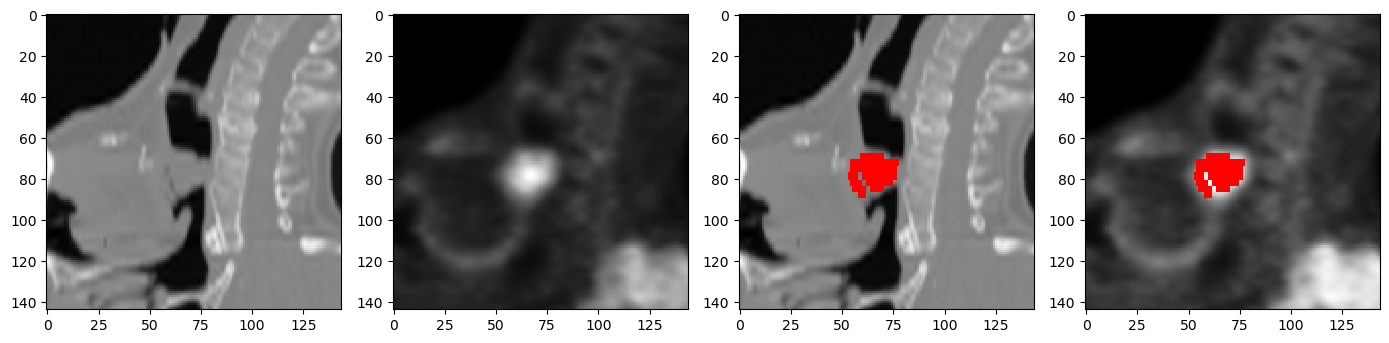

In [17]:
import os
import sys
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
import SimpleITK as sitk
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt

path_to_output="hecktor2021_train\\hecktor2021_train\\hecktor_nii_resampled"
input_folder1 = Path(path_to_output)
patient_list = [f.name.split("_")[0] for f in input_folder1.rglob("*_ct*")]
n = 0
p =patient_list[15]

def read_nifti(path):
    """Read a NIfTI image. Return a SimpleITK Image."""
    nifti = sitk.ReadImage(str(path))
    return nifti
img_ct1 = read_nifti(input_folder1 / (p + '_ct.nii.gz'))
img_pt1 = read_nifti(input_folder1 / (p + '_pt.nii.gz'))
mask1 = read_nifti(input_folder1 / (p + '_gtvt.nii.gz'))

input_folder=input_folder1
img_ct = sitk.ReadImage(str([f for f in input_folder.rglob(p + "_ct*")][0].resolve()))
img_pt = sitk.ReadImage(str([f for f in input_folder.rglob(p + "_pt*")][0].resolve()))
mask = sitk.ReadImage(str([f for f in input_folder.rglob(p + "_gtvt*")][0].resolve()))

print(f'SIZE:')
print(f'CT: \t{img_ct.GetSize()} \nPET: \t{img_pt.GetSize()} \nMask: \t{mask.GetSize()}')
print('-' * 40)
print(f'SPACING:')
print(f'CT: \t{img_ct.GetSpacing()} \nPET: \t{img_pt.GetSpacing()} \nMask: \t{mask.GetSpacing()}') 
print('-' * 40)
print(f'ORIGIN:')
print(f'CT: \t{img_ct.GetOrigin()} \nPET: \t{img_pt.GetOrigin()} \nMask: \t{mask.GetOrigin()}') 
print('-' * 40)
print(f'DIRECTION:')
print(f'CT: \t{img_ct.GetDirection()} \nPET: \t{img_pt.GetDirection()} \nMask: \t{mask.GetDirection()}')

#Visualization:
from copy import copy
img_ct = sitk.GetArrayFromImage(img_ct)
img_pt = sitk.GetArrayFromImage(img_pt)
mask = sitk.GetArrayFromImage(mask)
img_ct_mask = np.ma.masked_where(img_ct * mask != 0, img_ct)
img_pt_mask = np.ma.masked_where(img_pt * mask != 0, img_pt)

s = 70

plt.rcdefaults()
palette = copy(plt.cm.Greys_r)
palette.set_bad(color='r', alpha=1)  # set color for the mask

fig, axes = plt.subplots(1, 4, figsize=(14, 10))
axes[0].imshow(img_ct[:, :, s], cmap=plt.cm.Greys_r, interpolation='none')
axes[1].imshow(img_pt[:, :, s], cmap=plt.cm.Greys_r, interpolation='none')
axes[2].imshow(img_ct_mask[:, :, s], cmap=palette, interpolation='none')
axes[3].imshow(img_pt_mask[:, :, s], cmap=palette, interpolation='none')
plt.tight_layout()
plt.show()

180
44
CHUS086
torch.Size([2, 144, 144, 144])
torch.Size([1, 144, 144, 144])
CHGJ082
torch.Size([2, 144, 144, 144])
torch.Size([1, 144, 144, 144])
Patient: 	['CHUP003']
Input: 		torch.Size([1, 2, 144, 144, 144])
Target: 	torch.Size([1, 1, 144, 144, 144])


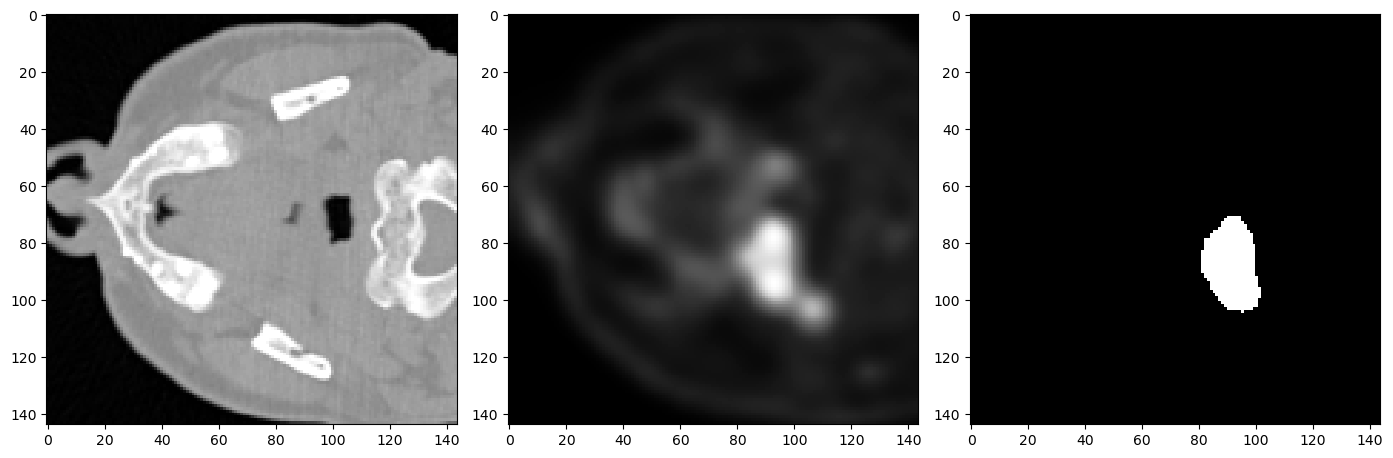

In [4]:
import torch 
from torch.utils.data import Dataset
from pathlib import Path
import os
import pandas as pd
import sys
import pathlib
from pathlib import Path
import numpy as np
import SimpleITK as sitk
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import nibabel as nib

import random
import numpy as np

from skimage.transform import rotate


class Compose:
    def __init__(self, transforms=None):
        self.transforms = transforms

    def __call__(self, sample):
        for transform in self.transforms:
            sample = transform(sample)

        return sample


    
class ToTensor1:  
    def __call__(self, sample):
        img, mask = sample['input'], sample['target']
        img = np.transpose(img, axes=[3, 0, 1, 2])
        mask = np.transpose(mask, axes=[3, 0, 1, 2])
        img = torch.from_numpy(img).float()
        mask = torch.from_numpy(mask).float()
        sample['input'], sample['target'] = img, mask
        return sample

class NormalizeIntensity:

    def __call__(self, sample):
        img = sample['input']
        img[:, :, :, 0] = self.normalize_ct(img[:, :, :, 0])
        img[:, :, :, 1] = self.normalize_pt(img[:, :, :, 1])

        sample['input'] = img
        return sample

    @staticmethod
    def normalize_ct(img):
        norm_img = np.clip(img, -1024, 1024) / 1024
        return norm_img

    @staticmethod
    def normalize_pt(img):
        mean = np.mean(img)
        std = np.std(img)
        return (img - mean) / (std + 1e-3)


class headneckDataset(Dataset):
    
    def __init__(self,imgpath,csvpath,fold,transform=None):
        self.imgpath=imgpath
        self.csvpath=csvpath
        self.transform=transform
        self.fold=fold
        input_folder=Path(self.imgpath)
        pathfile=os.path.join(self.csvpath,self.fold)
        patientfile=pd.read_csv(pathfile)
        self.pathctlist=[]
        self.pathptlist=[]
        self.pathgtvtlist=[]
        self.path_id=[]
        for p in patientfile['PatientID']:
            pathct=str([f for f in input_folder.rglob(p + "_ct*")][0].resolve())
            pathpt=str([f for f in input_folder.rglob(p + "_pt*")][0].resolve())
            pathgtvt=str([f for f in input_folder.rglob(p + "_gtvt*")][0].resolve())
            self.pathctlist.append(pathct)
            self.pathptlist.append(pathpt)
            self.pathgtvtlist.append(pathgtvt)
            self.path_id.append(p)
            #print(pathct)
    
    def __len__(self):
        return(len(self.pathptlist))
    
    def __getitem__(self, idx):
        sample=dict()
        
        pathct=self.pathctlist[idx]
        ct_img=self.read_nifti(pathct,True)
        pathpt=self.pathptlist[idx]
        pt_img=self.read_nifti(pathpt,True)
        imgc=[ct_img,pt_img]
        img = np.stack(imgc, axis=-1)
        
        sample['input']= img
        
        pathmask=self.pathgtvtlist[idx]
        mask=self.read_nifti(pathmask,True)
        mask = np.expand_dims(mask, axis=3)
        sample['target']= mask
        
        sample['id'] = self.path_id[idx]
        if self.transform is not None:
            sample = self.transform(sample)
        
        return sample
        
    
    def read_nifti(self,path_to_nifti, return_numpy=True):
        """Read a NIfTI image. Return a numpy array (default) or `nibabel.nifti1.Nifti1Image` object"""
        if return_numpy:
            return nib.load(str(path_to_nifti)).get_fdata()
        return nib.load(str(path_to_nifti))
 
pathpatient="hecktor2021_train\\hecktor2021_train\\hecktor_nii_resampled"
#input_folder=Path(pathpatient)
pathcsv="hecktor2021_train\\hecktor2021_train\\CV_ids"
foldtrain='train_fold0.csv'
foldvalid='valid_fold0.csv'
#pathfile=os.path.join(pathcsv,'train_fold0.csv')    
#dataset=headneckDataset(imgpath=pathpatient,csvpath=pathcsv,fold=fold1,transform=None)       

# print(len(dataset)) 
   
 
# sample=dataset[0]   
# print(sample['id'])  
# print(sample['input'].shape) 
# print(sample['target'].shape)   

#Data transforms
train_transforms = Compose([
    #RandomRotation(p=0.5, angle_range=[0, 45]),
    #Mirroring(p=0.5),
    NormalizeIntensity(),
    ToTensor1()
])



val_transforms =Compose([
    NormalizeIntensity(),
    ToTensor1()
])

train_set = headneckDataset(imgpath=pathpatient,csvpath=pathcsv,fold=foldtrain,transform=train_transforms)
print(len(train_set)) 
val_set = headneckDataset(imgpath=pathpatient,csvpath=pathcsv,fold=foldvalid,transform=val_transforms)
print(len(val_set)) 
   
 
sample=train_set[0]   
print(sample['id'])  
print(sample['input'].shape) 
print(sample['target'].shape)   

sample=val_set[0]   
print(sample['id'])  
print(sample['input'].shape) 
print(sample['target'].shape)  

train_batch_size = 1
val_batch_size = 1
num_workers = 2  # for example, use a number of CPU cores

# # Datasets:
# train_set = dataset.HecktorDataset(train_paths, transforms=train_transforms)
# val_set = dataset.HecktorDataset(val_paths, transforms=val_transforms)
from torch.utils.data import DataLoader
# Dataloaders:
train_loader = DataLoader(train_set, batch_size=train_batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_set, batch_size=val_batch_size, shuffle=False, num_workers=0)
#from torch.utils.data import DataLoader
dataloaders = {
    'train': train_loader,
    'val': val_loader
}

#One training sample
train_sample = next(iter(train_loader))
train_sample.keys()

print(f'Patient: \t{train_sample["id"]}')
print(f'Input: \t\t{train_sample["input"].size()}')
print(f'Target: \t{train_sample["target"].size()}')

img = train_sample['input'][0]
mask = train_sample['target'][0]

s = 77

fig, axes = plt.subplots(1, 3, figsize=(14, 10))
axes[0].imshow(img[0, :, :, s], cmap=plt.cm.Greys_r, interpolation='none')
axes[1].imshow(img[1, :, :, s], cmap=plt.cm.Greys_r, interpolation='none')
axes[2].imshow(mask[0, :, :, s], cmap=plt.cm.Greys_r, interpolation='none')
plt.tight_layout()
plt.show()

Patient: 	['CHUP003']
Input: 		torch.Size([1, 2, 144, 144, 144])
Target: 	torch.Size([1, 1, 144, 144, 144])


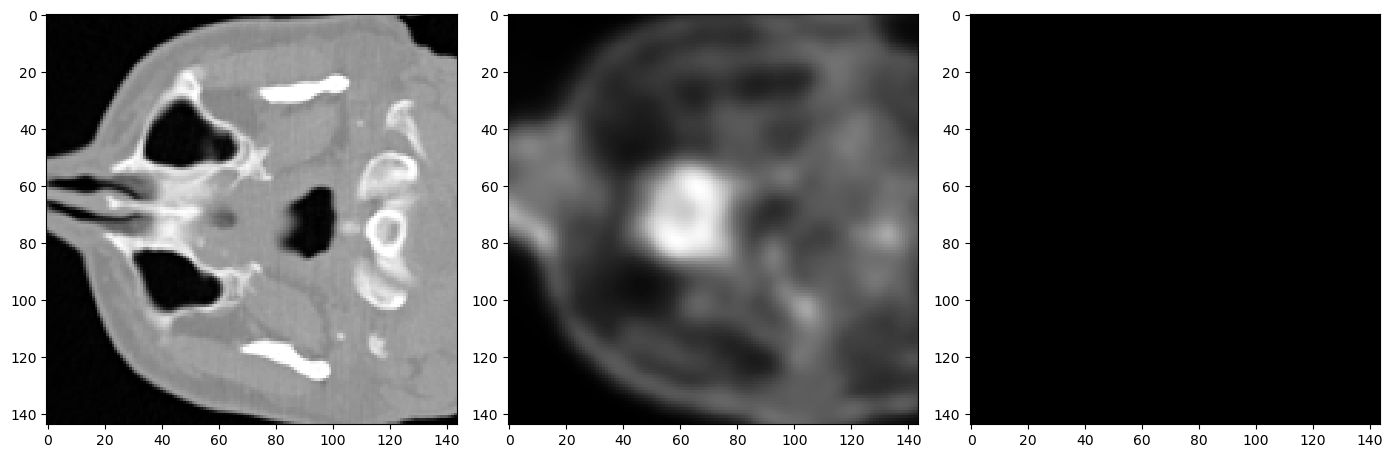

In [5]:
print(f'Patient: \t{train_sample["id"]}')
print(f'Input: \t\t{train_sample["input"].size()}')
print(f'Target: \t{train_sample["target"].size()}')

img = train_sample['input'][0]
mask = train_sample['target'][0]

s = 88

fig, axes = plt.subplots(1, 3, figsize=(14, 10))
axes[0].imshow(img[0, :, :, s], cmap=plt.cm.Greys_r, interpolation='none')
axes[1].imshow(img[1, :, :, s], cmap=plt.cm.Greys_r, interpolation='none')
axes[2].imshow(mask[0, :, :, s], cmap=plt.cm.Greys_r, interpolation='none')
plt.tight_layout()
plt.show()

Patient: 	['CHUP003']
Input: 		torch.Size([1, 2, 144, 144, 144])
Target: 	torch.Size([1, 1, 144, 144, 144])


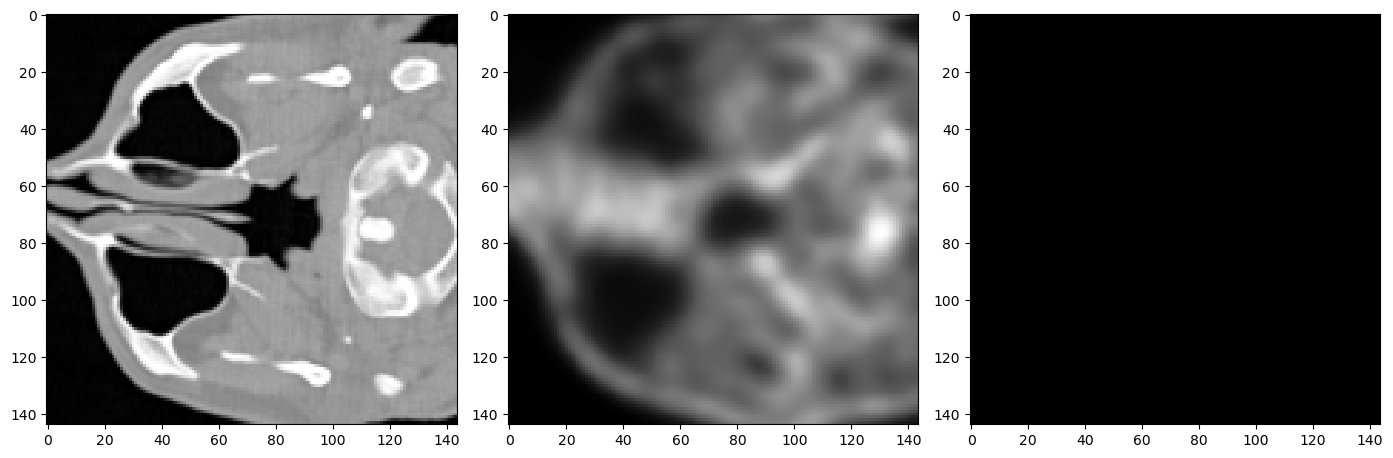

In [6]:
print(f'Patient: \t{train_sample["id"]}')
print(f'Input: \t\t{train_sample["input"].size()}')
print(f'Target: \t{train_sample["target"].size()}')

img = train_sample['input'][0]
mask = train_sample['target'][0]

s = 100

fig, axes = plt.subplots(1, 3, figsize=(14, 10))
axes[0].imshow(img[0, :, :, s], cmap=plt.cm.Greys_r, interpolation='none')
axes[1].imshow(img[1, :, :, s], cmap=plt.cm.Greys_r, interpolation='none')
axes[2].imshow(mask[0, :, :, s], cmap=plt.cm.Greys_r, interpolation='none')
plt.tight_layout()
plt.show()

Patient: 	['CHUP003']
Input: 		torch.Size([1, 2, 144, 144, 144])
Target: 	torch.Size([1, 1, 144, 144, 144])


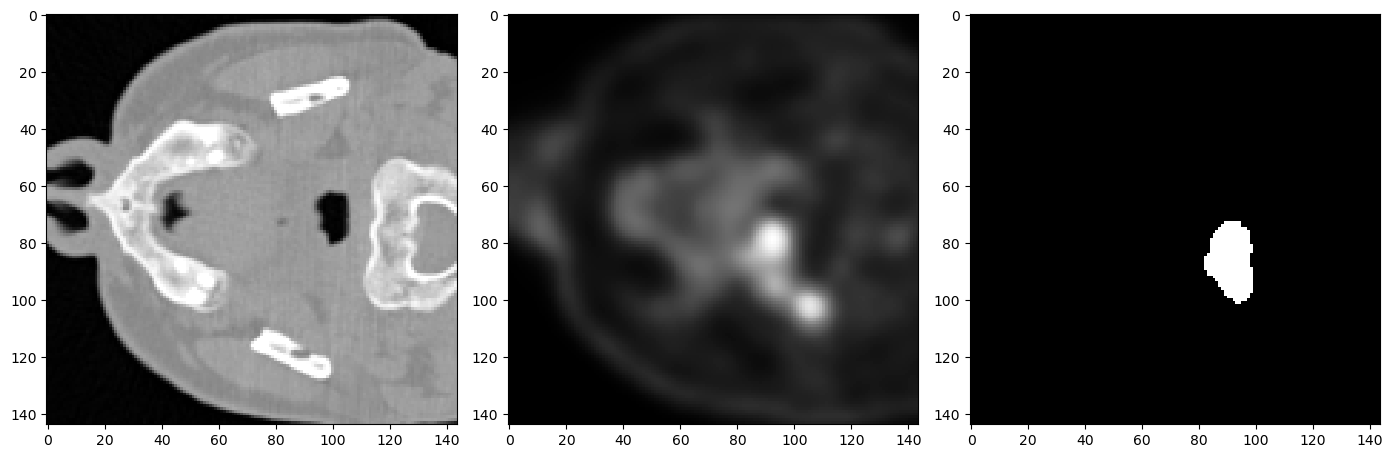

In [11]:
print(f'Patient: \t{train_sample["id"]}')
print(f'Input: \t\t{train_sample["input"].size()}')
print(f'Target: \t{train_sample["target"].size()}')

img = train_sample['input'][0]
mask = train_sample['target'][0]

s = 80

fig, axes = plt.subplots(1, 3, figsize=(14, 10))
axes[0].imshow(img[0, :, :, s], cmap=plt.cm.Greys_r, interpolation='none')
axes[1].imshow(img[1, :, :, s], cmap=plt.cm.Greys_r, interpolation='none')
axes[2].imshow(mask[0, :, :, s], cmap=plt.cm.Greys_r, interpolation='none')
plt.tight_layout()
plt.show()